In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from scipy import stats
from scipy.stats import shapiro



In [2]:
df_train=pd.read_csv('train.csv')
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [4]:
df_test=pd.read_csv('test.csv')
df_test

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [5]:
df_train.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [6]:
df_train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

<AxesSubplot:>

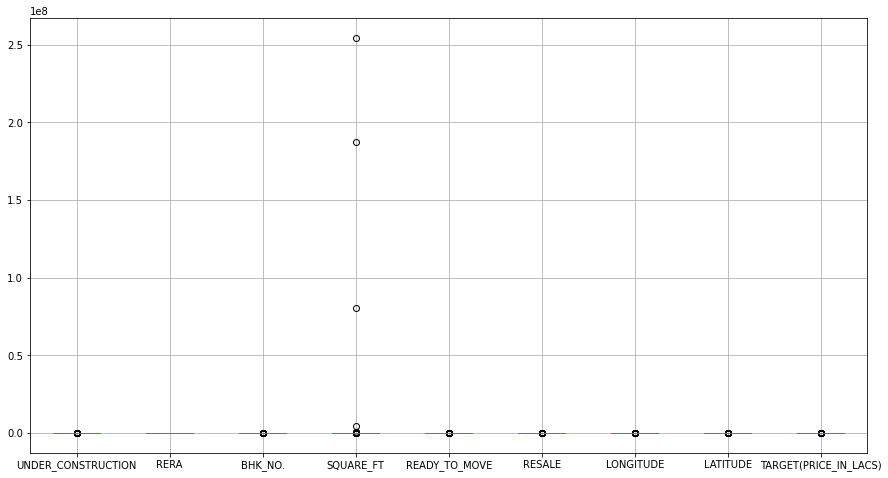

In [7]:
plt.figure(figsize=(15,8))
df_train.boxplot()

<AxesSubplot:xlabel='POSTED_BY', ylabel='count'>

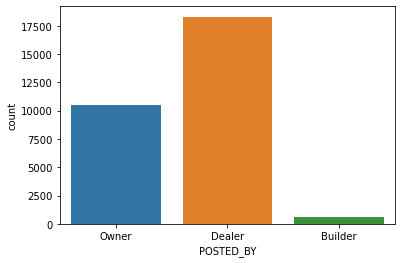

In [8]:
sns.countplot(df_train['POSTED_BY'])

<AxesSubplot:>

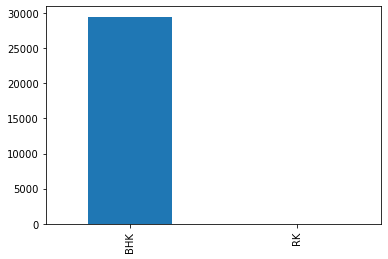

In [9]:
df_train['BHK_OR_RK'].value_counts().plot(kind='bar')

In [10]:
df_train['UNDER_CONSTRUCTION'].unique()

array([0, 1], dtype=int64)

In [11]:
df_train['RERA'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:>

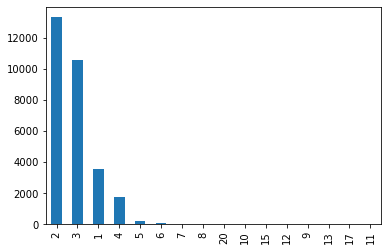

In [12]:
df_train['BHK_NO.'].value_counts().plot(kind='bar')

<AxesSubplot:>

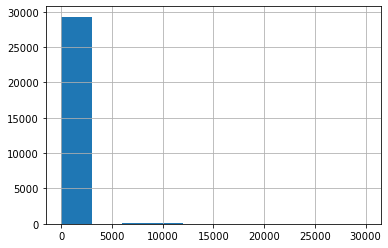

In [13]:
df_train['TARGET(PRICE_IN_LACS)'].hist()

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

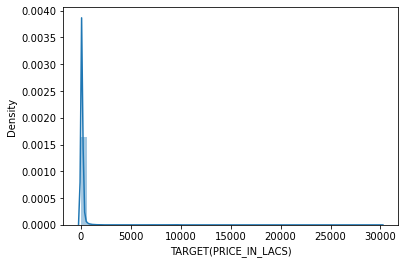

In [14]:
sns.distplot(df_train['TARGET(PRICE_IN_LACS)'])

In [70]:
df_train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


<AxesSubplot:>

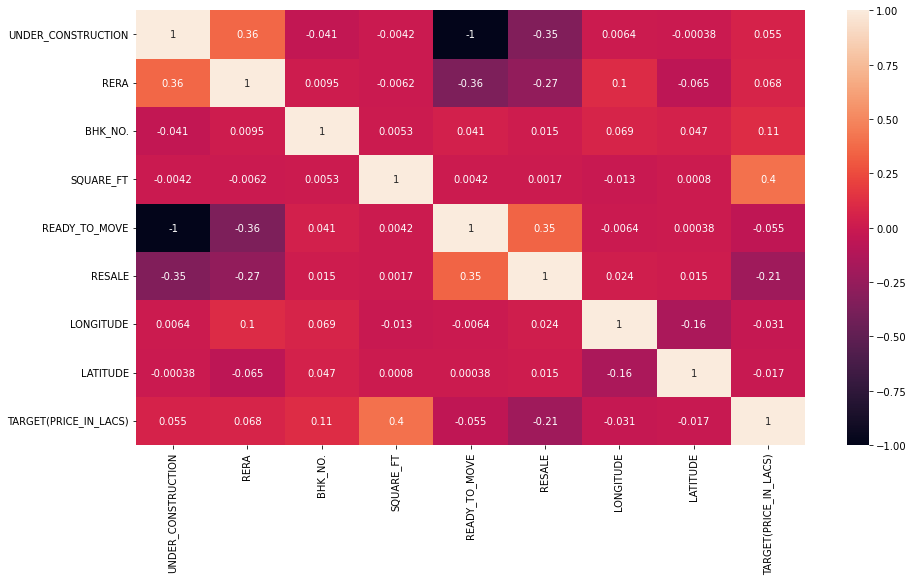

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot=True,vmin=-1,vmax=+1)

In [17]:
df_train['CITY'] = df_train['ADDRESS'].str.split(",").str[-1]

In [15]:
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,Chennai


In [18]:
df_train.drop('ADDRESS',axis=1,inplace=True)

In [17]:
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Agra
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,Vapi
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Chennai


In [19]:
df_train['CITY'].unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [20]:
df_train.CITY

0        Bangalore
1           Mysore
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29446         Agra
29447         Vapi
29448       Jaipur
29449      Chennai
29450       Jaipur
Name: CITY, Length: 29451, dtype: object

In [21]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'
    
df_train['city_tier'] = df_train['CITY'].apply(map_city)


In [22]:
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,tier2
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,tier1
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,tier2
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,tier1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Agra,tier2
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,Vapi,tier3
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur,tier2
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Chennai,tier1


In [23]:
df_train[df_train['city_tier']=='tier1']

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,tier1
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,tier1
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,tier1
8,Dealer,0,1,2,BHK,1040.000000,1,1,13.054202,77.674002,41.6,Bangalore,tier1
9,Owner,0,1,2,BHK,879.120879,1,1,12.951610,80.140970,36.0,Chennai,tier1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29436,Owner,1,1,2,BHK,1175.132676,0,1,12.995893,77.761394,62.0,Bangalore,tier1
29437,Dealer,0,0,2,BHK,760.116253,1,1,22.541110,88.337780,34.0,Kolkata,tier1
29443,Dealer,0,1,3,BHK,1161.194975,1,1,19.111438,72.878724,220.0,Maharashtra,tier1
29444,Dealer,1,1,1,BHK,752.049334,0,1,19.175900,72.952200,100.0,Mumbai,tier1


In [24]:
df_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,city_tier
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore,tier1
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore,tier2
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore,tier1
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad,tier2
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata,tier1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0,Agra,tier2
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0,Vapi,tier3
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1,Jaipur,tier2
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0,Chennai,tier1


In [26]:
df_num=df_train.select_dtypes(np.number)
df_num

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0


In [27]:
cat_col=df_train.select_dtypes(include='object')
cat_col

,POSTED_BY,BHK_OR_RK,CITY,city_tier
0,Owner,BHK,Bangalore,tier1
1,Dealer,BHK,Mysore,tier2
2,Owner,BHK,Bangalore,tier1
3,Owner,BHK,Ghaziabad,tier2
4,Dealer,BHK,Kolkata,tier1
...,...,...,...,...
29446,Owner,BHK,Agra,tier2
29447,Owner,BHK,Vapi,tier3
29448,Dealer,BHK,Jaipur,tier2
29449,Owner,BHK,Chennai,tier1


In [28]:
cat_col=cat_col.drop('CITY',axis=1)
cat_col

,POSTED_BY,BHK_OR_RK,city_tier
0,Owner,BHK,tier1
1,Dealer,BHK,tier2
2,Owner,BHK,tier1
3,Owner,BHK,tier2
4,Dealer,BHK,tier1
...,...,...,...
29446,Owner,BHK,tier2
29447,Owner,BHK,tier3
29448,Dealer,BHK,tier2
29449,Owner,BHK,tier1


In [29]:
cat_col=pd.get_dummies(cat_col,drop_first=True)
cat_col

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,city_tier_tier2,city_tier_tier3
0,0,1,0,0,0
1,1,0,0,1,0
2,0,1,0,0,0
3,0,1,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
29446,0,1,0,1,0
29447,0,1,0,0,1
29448,1,0,0,1,0
29449,0,1,0,0,0


In [30]:
x=pd.concat([df_num,cat_col],axis=1)
x

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,city_tier_tier2,city_tier_tier3
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,1,0,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,1,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,1,0,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,1,0,0,1
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,1,0,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,1,0,0,0


In [31]:
X=x.drop('TARGET(PRICE_IN_LACS)',axis=1)
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,city_tier_tier2,city_tier_tier3
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,1,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,1,0,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,1,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,0,1,0,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,0,1,0,0,1
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,1,0,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,0,1,0,0,0


In [32]:
y=df_train['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20615, 13)
(8836, 13)
(20615,)
(8836,)


In [34]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
X_test_sc=pd.DataFrame(sc.transform(x_train),columns=x_train.columns)

In [35]:
x_train_sc_cns = sm.add_constant(X_train_sc)
x_test_sc_cns = sm.add_constant(X_test_sc)


In [36]:
y_train=y_train.values.reshape(-1,1)

In [37]:
model=sm.OLS(y_train,x_train_sc_cns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     435.1
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:59:24   Log-Likelihood:            -1.6109e+05
No. Observations:               20615   AIC:                         3.222e+05
Df Residuals:                   20602   BIC:                         3.223e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                145.3432      4.173     34.833      0.000     137.165     153.522
UNDER_CONSTRUCTION   -11.1401      2.364     -4.713      0.000     -15.773      -6.507
RERA                   7.8377      4.667      1.679      0.093      -1.310      16.985
BHK_NO.               79.5334      4.268     18.635      0.000      71.168      87.899
SQUARE_FT            239.4030      4.173     57.366      0.000     231.223     247.583
READY_TO_MOVE         11.1401      2.364      4.713      0.000       6.507      15.773
RESALE              -180.2495      5.230    -34.462      0.000    -190.501    -169.998
LONGITUDE            -10.4452      5.302     -1.970      0.049     -20.838      -0.052
LATITUDE             -12.7909      4.249     -3.011      0.003     -21.118      -4.463
POSTED_BY_Dealer     229.5741     16.645     13.793      0.000     196.949     262.199
POSTED_BY_Owner      200.9819     16.957     11.852      0.000     167.745     234.219
BHK_OR_RK_RK          -0.5575      4.186     -0.133      0.894      -8.762       7.647
city_tier_tier2      -34.3918      5.700     -6.034      0.000     -45.564     -23.219
city_tier_tier3        0.4931      4.896      0.101      0.920      -9.104      10.090
==============================================================================
Omnibus:                    35186.569   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25060329.574
Skew:                          12.068   Prob(JB):                         0.00
Kurtosis:                     172.094   Cond. No.                     1.98e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Skewness of the residuals:  12.068625003955919


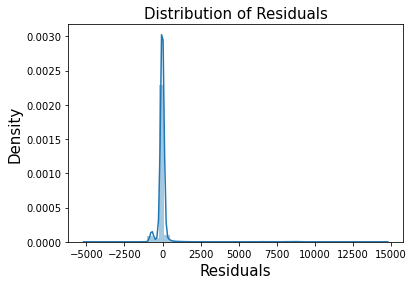

In [38]:
sns.distplot(model.resid)
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", model.resid.skew())

In [39]:
from statsmodels.graphics.gofplots import qqplot

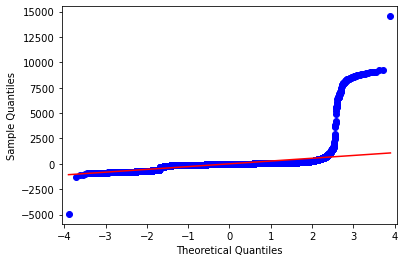

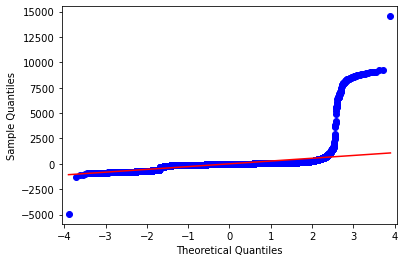

In [40]:
qqplot(model.resid,line='r')

In [41]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.21074479818344116, pvalue=0.0)

In [42]:
model=sm.OLS(np.log(y_train),x_train_sc_cns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1331.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:59:41   Log-Likelihood:                -21238.
No. Observations:               20615   AIC:                         4.250e+04
Df Residuals:                   20602   BIC:                         4.260e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2127      0.005    891.956      0.000       4.203       4.222
UNDER_CONSTRUCTION    -0.0172      0.003     -6.411      0.000      -0.022      -0.012
RERA                   0.0646      0.005     12.225      0.000       0.054       0.075
BHK_NO.                0.4505      0.005     93.240      0.000       0.441       0.460
SQUARE_FT              0.0526      0.005     11.143      0.000       0.043       0.062
READY_TO_MOVE          0.0172      0.003      6.411      0.000       0.012       0.022
RESALE                -0.0911      0.006    -15.391      0.000      -0.103      -0.080
LONGITUDE             -0.0788      0.006    -13.134      0.000      -0.091      -0.067
LATITUDE              -0.0752      0.005    -15.635      0.000      -0.085      -0.066
POSTED_BY_Dealer       0.3907      0.019     20.739      0.000       0.354       0.428
POSTED_BY_Owner        0.1584      0.019      8.253      0.000       0.121       0.196
BHK_OR_RK_RK           0.0012      0.005      0.255      0.799      -0.008       0.010
city_tier_tier2       -0.2128      0.006    -32.978      0.000      -0.225      -0.200
city_tier_tier3       -0.0166      0.006     -2.997      0.003      -0.027      -0.006
==============================================================================
Omnibus:                     6138.702   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80964.516
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                      12.475   Cond. No.                     1.98e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Skewness of the residuals:  1.0597559272356012


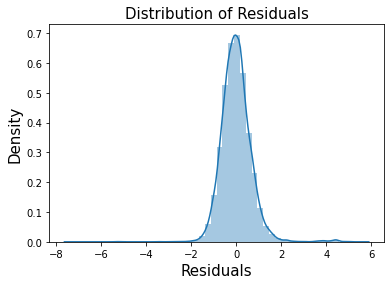

In [43]:
sns.distplot(model.resid)
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", model.resid.skew())

In [50]:
pval=model.pvalues
impt_features = list(pval[pval<0.05].index)
print(impt_features)




['const', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'city_tier_tier2', 'city_tier_tier3']


In [53]:
X=X[['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'city_tier_tier2', 'city_tier_tier3']]
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,city_tier_tier2,city_tier_tier3
0,0,0,2,1300.236407,1,1,12.969910,77.597960,0,1,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,1,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,0,1,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,0,1,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,0,1,1,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,0,1,0,1
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,1,0,1,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,0,1,0,0


In [54]:
y=df_train['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20615, 12)
(8836, 12)
(20615,)
(8836,)


In [56]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
X_test_sc=pd.DataFrame(sc.transform(x_train),columns=x_train.columns)

In [57]:
x_train_sc_cns = sm.add_constant(X_train_sc)
x_test_sc_cns = sm.add_constant(X_test_sc)


In [59]:
y_train=y_train.values.reshape(-1,1)

In [61]:
model=sm.OLS(np.log(y_train),x_train_sc_cns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     1452.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:08:12   Log-Likelihood:                -21238.
No. Observations:               20615   AIC:                         4.250e+04
Df Residuals:                   20603   BIC:                         4.259e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2127      0.005    891.976      0.000       4.203       4.222
UNDER_CONSTRUCTION    -0.0171      0.003     -6.410      0.000      -0.022      -0.012
RERA                   0.0646      0.005     12.225      0.000       0.054       0.075
BHK_NO.                0.4504      0.005     93.293      0.000       0.441       0.460
SQUARE_FT              0.0526      0.005     11.144      0.000       0.043       0.062
READY_TO_MOVE          0.0171      0.003      6.410      0.000       0.012       0.022
RESALE                -0.0911      0.006    -15.390      0.000      -0.103      -0.080
LONGITUDE             -0.0788      0.006    -13.133      0.000      -0.091      -0.067
LATITUDE              -0.0752      0.005    -15.634      0.000      -0.085      -0.066
POSTED_BY_Dealer       0.3905      0.019     20.746      0.000       0.354       0.427
POSTED_BY_Owner        0.1582      0.019      8.250      0.000       0.121       0.196
city_tier_tier2       -0.2128      0.006    -32.978      0.000      -0.225      -0.200
city_tier_tier3       -0.0166      0.006     -2.990      0.003      -0.027      -0.006
==============================================================================
Omnibus:                     6138.430   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80940.728
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                      12.473   Cond. No.                     1.77e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()

In [66]:
x_train_sc_cns = sm.add_constant(X_train_sc)

vif['VIF']=[variance_inflation_factor(x_train_sc_cns.values,i) for i in range(x_train_sc_cns.shape[1])]
vif['features']=x_train_sc_cns.columns
vif

,VIF,features
0,1.000000,const
1,inf,UNDER_CONSTRUCTION
2,1.251001,RERA
3,1.044950,BHK_NO.
4,1.000340,SQUARE_FT
5,inf,READY_TO_MOVE
6,1.571247,RESALE
7,1.614797,LONGITUDE
8,1.036728,LATITUDE
9,15.886330,POSTED_BY_Dealer


In [67]:
X=X[[ 'RERA', 'BHK_NO.', 'SQUARE_FT', 'RESALE', 'LONGITUDE', 'LATITUDE', 'POSTED_BY_Dealer', 'POSTED_BY_Owner', 'city_tier_tier2', 'city_tier_tier3']]
X

,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,city_tier_tier2,city_tier_tier3
0,0,2,1300.236407,1,12.969910,77.597960,0,1,0,0
1,0,2,1275.000000,1,12.274538,76.644605,1,0,1,0
2,0,2,933.159722,1,12.778033,77.632191,0,1,0,0
3,1,2,929.921143,1,28.642300,77.344500,0,1,1,0
4,0,2,999.009247,1,22.592200,88.484911,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29446,0,3,2500.000000,1,27.140626,78.043277,0,1,1,0
29447,0,2,769.230769,1,39.945409,-86.150721,0,1,0,1
29448,0,2,1022.641509,1,26.928785,75.828002,1,0,1,0
29449,0,2,927.079009,1,12.900150,80.227910,0,1,0,0


In [68]:
y=df_train['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20615, 10)
(8836, 10)
(20615,)
(8836,)


In [70]:
sc=StandardScaler()
X_train_sc=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
X_test_sc=pd.DataFrame(sc.transform(x_train),columns=x_train.columns)

In [71]:
x_train_sc_cns = sm.add_constant(X_train_sc)
x_test_sc_cns = sm.add_constant(X_test_sc)


In [72]:
y_train=y_train.values.reshape(-1,1)

In [75]:
model=sm.OLS(np.log(y_train),x_train_sc_cns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1590.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:19:12   Log-Likelihood:                -21258.
No. Observations:               20615   AIC:                         4.254e+04
Df Residuals:                   20604   BIC:                         4.263e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.2127      0.005    891.110      0.000       4.203       4.222
RERA                 0.0553      0.005     10.874      0.000       0.045       0.065
BHK_NO.              0.4520      0.005     93.646      0.000       0.443       0.461
SQUARE_FT            0.0527      0.005     11.138      0.000       0.043       0.062
RESALE              -0.0827      0.006    -14.315      0.000      -0.094      -0.071
LONGITUDE           -0.0784      0.006    -13.052      0.000      -0.090      -0.067
LATITUDE            -0.0759      0.005    -15.775      0.000      -0.085      -0.066
POSTED_BY_Dealer     0.3943      0.019     20.938      0.000       0.357       0.431
POSTED_BY_Owner      0.1656      0.019      8.643      0.000       0.128       0.203
city_tier_tier2     -0.2125      0.006    -32.907      0.000      -0.225      -0.200
city_tier_tier3     -0.0172      0.006     -3.097      0.002      -0.028      -0.006
==============================================================================
Omnibus:                     6174.879   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82957.263
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                      12.595   Cond. No.                         8.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
from sklearn.feature_selection import RFE

In [78]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=4)
rfe.fit(x_train_sc_cns,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [79]:
rfe_df = pd.DataFrame({'Feature':x_train_sc_cns.columns,'Rank':rfe.ranking_})
rfe_df[rfe_df['Rank']==1]

,Feature,Rank
3,SQUARE_FT,1
4,RESALE,1
7,POSTED_BY_Dealer,1
8,POSTED_BY_Owner,1


In [97]:
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)

In [98]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.18548507850359364
0.30531710544727386


In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

preds = rf_model.predict(x_test)

print('Random Forest: ', r2_score(y_test, preds))

Random Forest:  0.9071521809582797


In [100]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

preds = dt.predict(x_train)

r2_score(y_train, preds)

0.9873582755952115